In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable


import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

figdir = '/g/data/e14/pc5520/figures/basal_melt_param/'

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 6
Total threads: 24,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42459,Workers: 6
Dashboard: /proxy/8787/status,Total threads: 24
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:46883,Total threads: 4
Dashboard: /proxy/44633/status,Memory: 21.33 GiB
Nanny: tcp://127.0.0.1:41543,


In [3]:
session_name = '/g/data/v45/wf4500/databases/gdata_01deg_jra55v13_ryf9091_DSW.db'
master_session = cc.database.create_session(session_name)
control = '01deg_jra55v13_ryf9091_DSW'

In [4]:
#fas = frazil only at the surface

basal_gade_woa_fas_true = 'accessom2-GPC034'
control_fas_false = 'accessom2-GPC035'
control_fas_true = 'accessom2-GPC036'

basal_gade_woa_fra = 'accessom2-GPC038'
icb_gade_woa_fra = 'accessom2-GPC039'

icb_gade_woa = '01deg_jra55v13_ryf9091_DSW_BasalGade_YesIcb'

control_br = 'accessom2-GPC043'

lat_slice  = slice(-80,-59)

In [5]:
# build database for these experiments:
session_name = '/g/data/ik11/databases/basal_melt_MOM5.db'
basal_melt_session = cc.database.create_session(session_name)

dir_list = ['/g/data/ik11/outputs/access-om2-01/basal_melt_outputs/accessom2-GPC034',
            '/g/data/ik11/outputs/access-om2-01/basal_melt_outputs/accessom2-GPC035',
            '/g/data/ik11/outputs/access-om2-01/basal_melt_outputs/accessom2-GPC036',
            '/g/data/ik11/outputs/access-om2-01/basal_melt_outputs/accessom2-GPC038',
            '/g/data/ik11/outputs/access-om2-01/basal_melt_outputs/accessom2-GPC039',
           '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_DSW_BasalGade_YesIcb/',
           '/g/data/ik11/outputs/access-om2-01/basal_melt_outputs/accessom2-GPC043']

cc.database.build_index(dir_list,basal_melt_session)

Indexing experiment: accessom2-GPC034


0it [00:00, ?it/s]


Indexing experiment: accessom2-GPC035


0it [00:00, ?it/s]


Indexing experiment: accessom2-GPC036


0it [00:00, ?it/s]


Indexing experiment: accessom2-GPC038


0it [00:00, ?it/s]


Indexing experiment: accessom2-GPC039


100%|██████████| 1/1 [00:00<00:00, 12.09it/s]


Indexing experiment: 01deg_jra55v13_ryf9091_DSW_BasalGade_YesIcb


0it [00:00, ?it/s]


Indexing experiment: accessom2-GPC043


100%|██████████| 12/12 [00:03<00:00,  3.51it/s]


13

In [6]:
start_time='1900-01-01'
end_time='1900-02-01'
control_br_brine3d = cc.querying.getvar(control_br,'brine_fwflx', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
control_br_brine3d = control_br_brine3d.sel(time=slice(start_time,end_time))
control_br_brine3d_sum = control_br_brine3d.sum('yt_ocean').sum('xt_ocean').sum('st_ocean').load()
control_br_brine3d_sumv = control_br_brine3d.sum('st_ocean').load()
control_br_brine3d_sumh = control_br_brine3d.sum('yt_ocean').sum('xt_ocean').load()

In [7]:
start_time='1900-01-01'
end_time='1900-02-01'
control_br_brine2d = cc.querying.getvar(control_br,'brine_fwflx2d', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
control_br_brine2d = control_br_brine2d.sel(time=slice(start_time,end_time))
control_br_brine2d_sum = control_br_brine2d.sum('yt_ocean').sum('xt_ocean').load()

In [10]:
control_br_brine2d_sum

<xarray.DataArray 'brine_fwflx2d' (time: 1)>
array([-177.17581], dtype=float32)
Coordinates:
  * time     (time) object 1900-01-16 12:00:00

In [9]:
control_br_brine3d_sum

<xarray.DataArray 'brine_fwflx' (time: 1)>
array([-183.20236], dtype=float32)
Coordinates:
  * time     (time) object 1900-01-16 12:00:00

In [11]:
start_time='1900-01-01'
end_time='1900-02-01'
control_br_wfiform = cc.querying.getvar(control_br,'wfiform', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
control_br_wfiform = control_br_wfiform.sel(time=slice(start_time,end_time))
control_br_wfiform_sum = control_br_wfiform.sum('yt_ocean').sum('xt_ocean').load()

In [12]:
control_br_wfiform_sum

<xarray.DataArray 'wfiform' (time: 1)>
array([-177.17581], dtype=float32)
Coordinates:
  * time     (time) object 1900-01-16 12:00:00

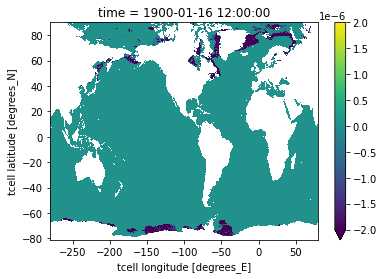

In [37]:
(control_br_brine3d_sumv - control_br_wfiform).plot(vmin=-0.000002,vmax=0.000002)

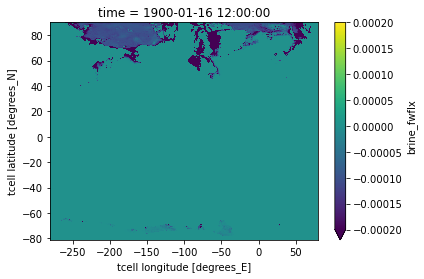

In [27]:
control_br_brine3d_sumv.plot(vmin=-0.0002,vmax=0.0002)

In [14]:
start_time='1900-01-01'
end_time='1900-02-01'
control_br_dz = cc.querying.getvar(control_br,'dzt', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)

In [22]:
np.where(control_br_brine3d_sumv<-0.029)

(array([0]), array([342]), array([434]))

In [19]:
control_br_dz[0,:,342,434].values

array([ 1.0777355,  1.1910131,  1.3161958,  1.4545348,  1.607412 ,
        1.7763548,  1.9630506,  2.1693637,  2.3973541,  2.649297 ,
        2.9277062,  3.235358 ,  3.575319 ,  3.9509752,  4.3660645,
        4.8247147,  5.3314795,  5.891383 ,  6.509967 ,  7.1933384,
        7.9482274,  8.782041 ,  9.702929 , 10.719846 , 11.842618 ,
       13.082014 , 14.449809 , 15.958852 , 17.623116 , 19.457748 ,
       21.479092 , 23.704672 , 26.153164 , 28.844269 , 31.79854  ,
       31.273674 ,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

(0.0, 10.0)

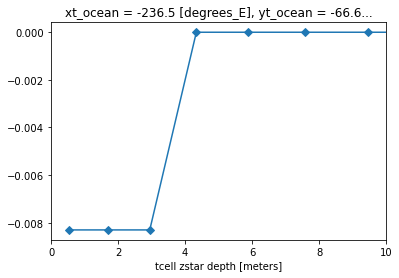

In [30]:
fig=plt.figure()

ax0=plt.subplot(111)
xmin=0
xmax=10

(control_br_brine3d[0,:,342,434]/control_br_dz[0,:,342,434]).plot(marker='D',ax=ax0)

ax0.set_xlim(xmin, xmax)

(0.0, 10.0)

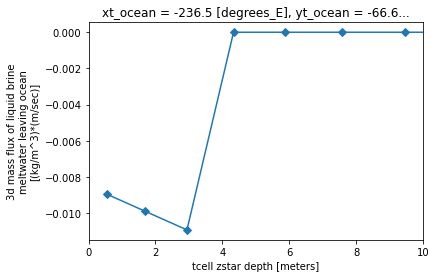

In [29]:
fig=plt.figure()

ax0=plt.subplot(111)
xmin=0
xmax=10

(control_br_brine3d[0,:,342,434]).plot(marker='D',ax=ax0)

ax0.set_xlim(xmin, xmax)